In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/研究所課程/期末專題_捷運/新站點/data/最終資料/修改日期後資料/借車/市政府.csv')
df = df.iloc[:,1:]
df

,時間,捷運站,借車數,氣溫,相對溼度,風速,降水量,紫外線指數,出站人數,進站人數,hour,星期
0,2021-07-03 00:00:00,市政府,20.0,28.2,70.0,0.8,0.0,0.0,100.0,351.0,0,Saturday
1,2021-07-10 00:00:00,市政府,22.0,27.0,75.0,1.2,0.0,0.0,93.0,391.0,0,Saturday
2,2021-07-17 00:00:00,市政府,22.0,30.8,61.0,0.8,0.0,0.0,101.0,377.0,0,Saturday
3,2021-07-24 00:00:00,市政府,17.0,28.8,66.0,1.0,0.0,0.0,79.0,384.0,0,Saturday
4,2021-07-03 06:00:00,市政府,19.0,27.2,72.0,1.1,0.0,0.0,817.0,309.0,6,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
739,2021-07-02 23:00:00,市政府,24.0,28.5,67.0,1.0,0.0,0.0,480.0,1395.0,23,Friday
740,2021-07-09 23:00:00,市政府,44.0,27.2,76.0,1.5,0.0,0.0,489.0,1448.0,23,Friday
741,2021-07-16 23:00:00,市政府,27.0,31.0,61.0,2.0,0.0,0.0,467.0,1451.0,23,Friday
742,2021-07-23 23:00:00,市政府,24.0,28.7,67.0,1.1,0.0,0.0,408.0,1437.0,23,Friday


In [ ]:
df['時間'] = pd.to_datetime(df['時間'])
df = df.sort_values(by=['時間'])

In [ ]:
df = df.rename(columns={'借車數':'Rents'})

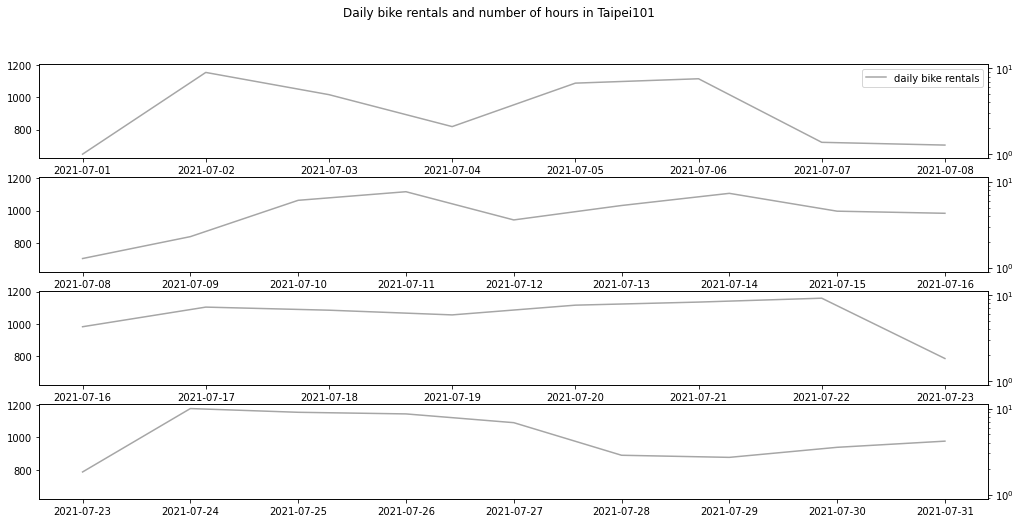

In [ ]:
min_date = df.時間.dt.date.min()
max_date = df.時間.dt.date.max()
center_date = min_date + (max_date - min_date)/2
second_quarter_date = min_date + (center_date - min_date)/2
third_quarter_date = center_date + (max_date - center_date)/2

dt_lims = [
    [min_date,second_quarter_date],
    [second_quarter_date,center_date],
    [center_date,third_quarter_date],
    [third_quarter_date,max_date + datetime.timedelta(days = 1)]
]

#aggregating rentals cnt at day level
series_for_trend_plot = df.set_index('時間').resample('d').Rents.sum().asfreq('d')

#subplots generation
fig, axs = plt.subplots(nrows=len(dt_lims),figsize=(17,8), sharey = True)

#pandas needs this
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#the bar chart will be on secondary y, on primary we'll place cnt trend
#let's create list for twin axs
axs2 = [i.twinx() for i in axs]
#set shared y for secondary y axes
axs2[0].get_shared_y_axes().join(*axs2)

for i in range(len(dt_lims)):

    trendline = series_for_trend_plot[dt_lims[i][0]:dt_lims[i][1]]


    #adding cnt trend on the primary y
    l = axs[i].plot(trendline.index,
                trendline,
                color = 'grey',
                alpha = 0.7,
                label = 'daily bike rentals'
               )

    #adding missing_logs bars on secondary y


    #make 2nd y axis on log scale to increase visibility
    axs2[i].set_yscale('log')

    #adding legend just on the first plot
    if i == 0:
        l_b = l
        labels = [lab.get_label() for lab in l_b]
        axs2[i].legend(l_b, labels)

plt.suptitle("Daily bike rentals and number of hours in Taipei101")
plt.show()

In [ ]:
cc = round(df['Rents'].rolling(3, min_periods=1).mean(),0)
cc = pd.DataFrame(cc,columns=['Rents'],index=df.index)
cc

,Rents
504,35.0
509,24.0
514,20.0
519,12.0
524,12.0
...,...
115,152.0
116,149.0
117,105.0
118,93.0


In [ ]:
cc = cc.rename(columns={'Rents':'new_Lend'})

In [ ]:
df = pd.concat([df,cc],axis=1)
df

,時間,捷運站,Rents,氣溫,相對溼度,風速,降水量,紫外線指數,出站人數,進站人數,hour,星期,new_Lend
504,2021-07-01 00:00:00,市政府,35.0,27.3,75.0,0.9,0.0,0.0,235.0,696.0,0,Thursday,35.0
509,2021-07-01 01:00:00,市政府,13.0,27.4,74.0,1.2,0.0,0.0,0.0,0.0,1,Thursday,24.0
514,2021-07-01 02:00:00,市政府,11.0,27.2,74.0,1.6,0.0,0.0,0.0,0.0,2,Thursday,20.0
519,2021-07-01 03:00:00,市政府,13.0,27.0,75.0,0.1,0.0,0.0,0.0,0.0,3,Thursday,12.0
524,2021-07-01 04:00:00,市政府,11.0,27.1,73.0,1.3,0.0,0.0,0.0,0.0,4,Thursday,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-07-31 19:00:00,市政府,114.0,30.0,62.0,1.3,0.0,0.0,3415.0,7446.0,19,Saturday,152.0
116,2021-07-31 20:00:00,市政府,118.0,29.4,69.0,0.3,0.0,0.0,1910.0,4839.0,20,Saturday,149.0
117,2021-07-31 21:00:00,市政府,84.0,29.1,72.0,1.5,0.0,0.0,1540.0,4302.0,21,Saturday,105.0
118,2021-07-31 22:00:00,市政府,77.0,28.5,73.0,1.1,0.0,0.0,1057.0,4705.0,22,Saturday,93.0


In [ ]:
Old = df.drop('星期',axis=1)
def insert_time(row):
  return row['時間'].replace(year=2017)
Old['時間'] = Old.apply(lambda r: insert_time(r), axis=1)

In [ ]:
import calendar
def week_add(a):
  c = []
  for i in range(len(a)):
    aa = a['時間'][i]
    b = calendar.day_name[aa.weekday()]
    c.append(b)
  a['星期'] = pd.DataFrame(c)
  return a

In [ ]:
Old = week_add(Old)
We = pd.DataFrame(Old['星期'])
We = We.set_index(df['時間'])
We

,星期
時間,
2021-07-01 00:00:00,Saturday
2021-07-01 01:00:00,Saturday
2021-07-01 02:00:00,Saturday
2021-07-01 03:00:00,Saturday
2021-07-01 04:00:00,Saturday
...,...
2021-07-31 19:00:00,Monday
2021-07-31 20:00:00,Monday
2021-07-31 21:00:00,Monday


In [ ]:
df = df.drop('hour',axis=1)
df = df.drop('星期',axis=1)
df = df.drop('捷運站',axis=1)

In [ ]:
df = df.set_index("時間")

In [ ]:
df2 = df.copy()

In [ ]:
df = df.drop('new_Lend',axis=1)

In [ ]:
X = df.drop('Rents',axis=1)
y = df['Rents']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1\
                    ,random_state=20)

In [ ]:
print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 669
Test size: 75


In [ ]:
lr_rmses = []
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
residual = (y_test - lr_prediction)
Rsq = lr.score(X_train,y_train)
w_0 = lr.intercept_
w_1 = lr.coef_

print('Interception : ', w_0)
print('Coeficient : ', w_1)
print("R sq :",round(r2_score(y_test,lr_prediction),3))
print("MSE :",round(mean_squared_error(y_test,lr_prediction),3))
print("RMSE :",round(mean_squared_error(y_test,lr_prediction)**0.5))

Interception :  -38.723603648781435
Coeficient :  [ 2.4623341  -0.23827925 -2.44671071 -2.23444    -2.46183454  0.00721457
  0.01521158]
R sq : 0.533
MSE : 515.725
RMSE : 23


加入時間類別dummy

In [ ]:
#加入時間dummy
def add_time(a):
  df1 = a
  df1['daytime_lbl'] = "[0:6)"
  df1.loc[(df1.index.hour >= 6) & (df1.index.hour < 9), 'daytime_lbl'] = "[6:9)"
  df1.loc[(df1.index.hour >= 9) & (df1.index.hour < 12), 'daytime_lbl'] = "[9:12)"
  df1.loc[(df1.index.hour >= 12) & (df1.index.hour < 16), 'daytime_lbl'] = "[12:16)"
  df1.loc[(df1.index.hour >= 16) & (df1.index.hour < 20), 'daytime_lbl'] = "[16:20)"
  df1.loc[(df1.index.hour >= 20) & (df1.index.hour < 24), 'daytime_lbl'] = "[20:23]"
  fig, axs = plt.subplots(ncols = 2, figsize = (12,5), sharey = True)
  c = sns.color_palette("Set1", 6)
  sns.boxplot(data = df1, x = "daytime_lbl", y = "Rents", ax = axs[0], palette = c)
  axs[0].set_title("Distribution of bikerental count split by daytime label")

  df2 = df1.pivot_table(values = "Rents", columns = "daytime_lbl", index = df1.index.to_period('D'))
  df2.plot(marker='.', alpha=0.7, linestyle='None', ax = axs[1], color = c)
  axs[1].set_title("Rentals by day hour category")

  df1['daytime_lbl'] = df1['daytime_lbl'].astype("category")
  df1 = pd.get_dummies(df1, columns = ['daytime_lbl'], drop_first = True, prefix = 'daytime_lbl')
  return df1

,Rents,氣溫,相對溼度,風速,降水量,紫外線指數,出站人數,進站人數,daytime_lbl_[12:16),daytime_lbl_[16:20),daytime_lbl_[20:23],daytime_lbl_[6:9),daytime_lbl_[9:12)
時間,,,,,,,,,,,,,
2021-07-01 00:00:00,23.0,27.3,75.0,0.9,0.0,0.0,184.0,299.0,0,0,0,0,0
2021-07-01 01:00:00,24.0,27.4,74.0,1.2,0.0,0.0,0.0,0.0,0,0,0,0,0
2021-07-01 02:00:00,6.0,27.2,74.0,1.6,0.0,0.0,0.0,0.0,0,0,0,0,0
2021-07-01 03:00:00,5.0,27.0,75.0,0.1,0.0,0.0,0.0,0.0,0,0,0,0,0
2021-07-01 04:00:00,8.0,27.1,73.0,1.3,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,91.0,30.0,62.0,1.3,0.0,0.0,1329.0,4404.0,0,1,0,0,0
2021-07-31 20:00:00,60.0,29.4,69.0,0.3,0.0,0.0,828.0,2371.0,0,0,1,0,0
2021-07-31 21:00:00,64.0,29.1,72.0,1.5,0.0,0.0,570.0,2307.0,0,0,1,0,0


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0, flags=flags)


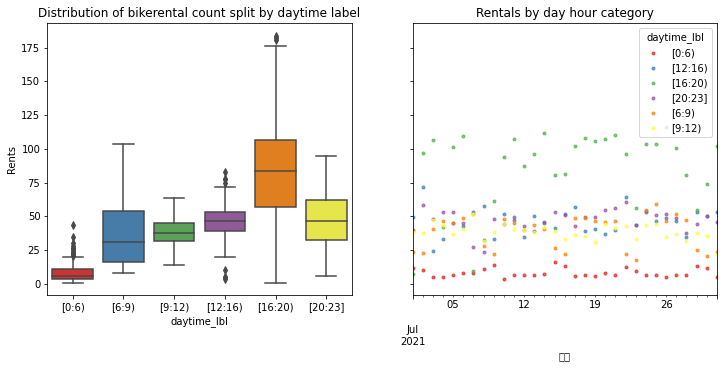

In [ ]:
df3 = add_time(df)
df3

In [ ]:
df3 = pd.concat([df3,We],axis=1)
df3

,Rents,氣溫,相對溼度,風速,降水量,紫外線指數,出站人數,進站人數,daytime_lbl_[12:16),daytime_lbl_[16:20),daytime_lbl_[20:23],daytime_lbl_[6:9),daytime_lbl_[9:12),星期
時間,,,,,,,,,,,,,,
2021-07-01 00:00:00,23.0,27.3,75.0,0.9,0.0,0.0,184.0,299.0,0,0,0,0,0,Saturday
2021-07-01 01:00:00,24.0,27.4,74.0,1.2,0.0,0.0,0.0,0.0,0,0,0,0,0,Saturday
2021-07-01 02:00:00,6.0,27.2,74.0,1.6,0.0,0.0,0.0,0.0,0,0,0,0,0,Saturday
2021-07-01 03:00:00,5.0,27.0,75.0,0.1,0.0,0.0,0.0,0.0,0,0,0,0,0,Saturday
2021-07-01 04:00:00,8.0,27.1,73.0,1.3,0.0,0.0,0.0,0.0,0,0,0,0,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,91.0,30.0,62.0,1.3,0.0,0.0,1329.0,4404.0,0,1,0,0,0,Monday
2021-07-31 20:00:00,60.0,29.4,69.0,0.3,0.0,0.0,828.0,2371.0,0,0,1,0,0,Monday
2021-07-31 21:00:00,64.0,29.1,72.0,1.5,0.0,0.0,570.0,2307.0,0,0,1,0,0,Monday


In [ ]:
def add_week(a):
  df1 = a.set_index("星期")
  df1['week'] = "week_day"
  #df1.loc[(df1.index == 'Tuesday') , 'week'] = "Tuesday"
  #df1.loc[(df1.index == 'Wednesday') , 'week'] = "Wednesday"
  #df1.loc[(df1.index == 'Thursday') , 'week'] = "Thursday"
  df1.loc[(df1.index == 'Friday') , 'week'] = "Firday"
  df1.loc[(df1.index == 'Saturday') , 'week'] = "Saturday"
  df1.loc[(df1.index == 'Sunday') , 'week'] = "Sunday"
  df1['week'] = df1['week'].astype("category")
  fig, axs = plt.subplots(figsize = (8,5), sharey = True)
  c = sns.color_palette("Set1", 4)
  sns.boxplot(data = df1, x = "week", y = "Rents", palette = c)
  plt.title("Distribution of bikerental count split by week")
  df1 = pd.get_dummies(df1, columns = ['week'], drop_first = True, prefix = 'week')
  df1 = df1.reset_index(drop=True)
  return df1

,Rents,氣溫,相對溼度,風速,降水量,紫外線指數,出站人數,進站人數,daytime_lbl_[12:16),daytime_lbl_[16:20),daytime_lbl_[20:23],daytime_lbl_[6:9),daytime_lbl_[9:12),week_Saturday,week_Sunday,week_week_day
0,23.0,27.3,75.0,0.9,0.0,0.0,184.0,299.0,0,0,0,0,0,1,0,0
1,24.0,27.4,74.0,1.2,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
2,6.0,27.2,74.0,1.6,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
3,5.0,27.0,75.0,0.1,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
4,8.0,27.1,73.0,1.3,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,91.0,30.0,62.0,1.3,0.0,0.0,1329.0,4404.0,0,1,0,0,0,0,0,1
740,60.0,29.4,69.0,0.3,0.0,0.0,828.0,2371.0,0,0,1,0,0,0,0,1
741,64.0,29.1,72.0,1.5,0.0,0.0,570.0,2307.0,0,0,1,0,0,0,0,1
742,52.0,28.5,73.0,1.1,0.0,0.0,384.0,1992.0,0,0,1,0,0,0,0,1


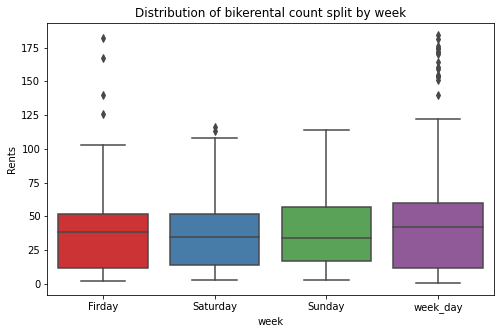

In [ ]:
df3 = add_week(df3)
df3

In [ ]:
X2 = df3.drop('Rents',axis=1)
y2 = df3['Rents']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.1\
                    ,random_state=20)

In [ ]:
lr_rmses = []
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
residual = (y_test - lr_prediction)
Rsq = lr.score(X_train,y_train)
w_0 = lr.intercept_
w_1 = lr.coef_

print('Interception : ', w_0)
print('Coeficient : ', w_1)
print("R sq :",round(r2_score(y_test,lr_prediction),3))
print("MSE :",round(mean_squared_error(y_test,lr_prediction),3))
print("RMSE :",round(mean_squared_error(y_test,lr_prediction)**0.5))

Interception :  -23.146736137858923
Coeficient :  [ 1.79148324e+00 -3.18021451e-01 -1.30156616e+00 -2.31633497e+00
 -1.42337481e+00  5.70632625e-03  1.53562659e-02 -2.21264615e+00
  8.89496789e+00  1.40419826e+00  1.33062636e+01  4.10041851e+00
 -3.15807790e+00  1.58576825e+00  7.80106614e+00]
R sq : 0.62
MSE : 419.814
RMSE : 20


殘差分析

In [ ]:
!pip install symbulate

In [ ]:
from scipy.stats import f
alpha = 0.05
p = 15
n = 669
nn = f.isf(q=alpha,dfn=p,dfd=n)
print(nn)

1.6813510185159042


In [ ]:
import symbulate as sym
fstat = (Rsq/(1-Rsq))*((669-15-1)/15)
pVal = 1-sym.F(668,14).cdf(fstat)
print('F-statistic :',round(fstat,3))
print('P-value :',pVal)

F-statistic : 127.435
P-value : 3.034239526300553e-13


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


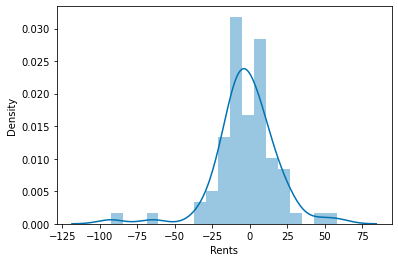

In [ ]:
sns.distplot(residual)

In [ ]:
residual = residual.reset_index(drop=True)
residual

0     -7.549993
1      4.304207
2     12.081204
3     -4.732720
4     58.504435
        ...    
70   -11.576930
71    28.895602
72   -19.517592
73     8.464348
74    -1.131437
Name: Rents, Length: 75, dtype: float64

In [ ]:
a = pd.DataFrame(lr_prediction,columns=['pre_rent'])

In [ ]:
b = pd.DataFrame(residual)
b = b.rename(columns={'Rents':'residual'})
b

,residual
0,-7.549993
1,4.304207
2,12.081204
3,-4.732720
4,58.504435
...,...
70,-11.576930
71,28.895602
72,-19.517592
73,8.464348


In [ ]:
aaa = X_test.reset_index(drop=True)

In [ ]:
aa = pd.concat([a,b,aaa],axis=1)
aa

,pre_rent,residual,氣溫,相對溼度,風速,降水量,紫外線指數,出站人數,進站人數,daytime_lbl_[12:16),daytime_lbl_[16:20),daytime_lbl_[20:23],daytime_lbl_[6:9),daytime_lbl_[9:12),week_Saturday,week_Sunday,week_week_day
0,44.549993,-7.549993,36.3,55.0,1.1,0.0,7.0,1388.0,1175.0,1,0,0,0,0,0,0,1
1,29.695793,4.304207,32.4,60.0,2.2,0.0,8.0,1450.0,518.0,0,0,0,0,1,0,0,1
2,56.918796,12.081204,28.7,68.0,0.2,0.0,0.0,752.0,2412.0,0,0,1,0,0,0,0,1
3,75.732720,-4.732720,33.2,59.0,1.8,0.0,7.0,5215.0,3001.0,1,0,0,0,0,1,0,0
4,117.495565,58.504435,32.0,49.0,3.2,0.0,1.0,2306.0,4860.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,55.576930,-11.576930,29.1,64.0,1.7,0.0,0.0,534.0,2808.0,0,0,1,0,0,0,1,0
71,77.104398,28.895602,32.3,56.0,2.7,0.0,1.0,1809.0,2482.0,0,1,0,0,0,0,0,1
72,89.517592,-19.517592,30.7,62.0,2.6,0.5,1.0,2546.0,4108.0,0,1,0,0,0,1,0,0
73,36.535652,8.464348,32.7,59.0,1.0,0.0,8.0,4159.0,513.0,0,0,0,0,1,1,0,0


In [ ]:
bbb = preprocessing.scale(aa)

In [ ]:
bbb = pd.DataFrame(bbb,columns=aa.columns)

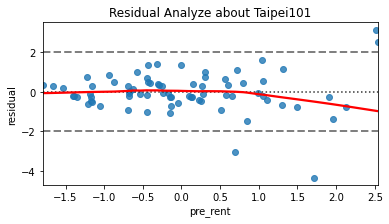

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.residplot(data=bbb, x="pre_rent", y="residual", lowess=True, line_kws=dict(color="r"))
ax.axhline(y=2, linestyle="--", color="grey", linewidth=2)
ax.axhline(y=-2, linestyle="--", color="grey", linewidth=2)
plt.title('Residual Analyze about Taipei101')
plt.show()